<a href="https://colab.research.google.com/github/ckgpeace/EIP4/blob/master/S7/S7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms, utils
import matplotlib.pyplot as plt
from pdb import set_trace as bp
import pandas as pd

import torch
import torchvision
import torchvision.transforms as transforms
from tqdm import tqdm


Training a Classifier
=====================

This is it. You have seen how to define neural networks, compute loss and make
updates to the weights of the network.

Now you might be thinking,

What about data?
----------------

Generally, when you have to deal with image, text, audio or video data,
you can use standard python packages that load data into a numpy array.
Then you can convert this array into a ``torch.*Tensor``.

-  For images, packages such as Pillow, OpenCV are useful
-  For audio, packages such as scipy and librosa
-  For text, either raw Python or Cython based loading, or NLTK and
   SpaCy are useful

Specifically for vision, we have created a package called
``torchvision``, that has data loaders for common datasets such as
Imagenet, CIFAR10, MNIST, etc. and data transformers for images, viz.,
``torchvision.datasets`` and ``torch.utils.data.DataLoader``.

This provides a huge convenience and avoids writing boilerplate code.

For this tutorial, we will use the CIFAR10 dataset.
It has the classes: ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’,
‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CIFAR-10 are of
size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size.

.. figure:: /_static/img/cifar10.png
   :alt: cifar10

   cifar10


Training an image classifier
----------------------------

We will do the following steps in order:

1. Load and normalizing the CIFAR10 training and test datasets using
   ``torchvision``
2. Define a Convolution Neural Network
3. Define a loss function
4. Train the network on the training data
5. Test the network on the test data

1. Loading and normalizing CIFAR10
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Using ``torchvision``, it’s extremely easy to load CIFAR10.



The output of torchvision datasets are PILImage images of range [0, 1].
We transform them to Tensors of normalized range [-1, 1].



In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
                                          shuffle=True, num_workers=8)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32,
                                         shuffle=False, num_workers=8)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


Let us show some of the training images, for fun.



0.0 horse torch.Size([3, 32, 32]) 1.0 plane torch.Size([3, 32, 32]) 2.0   cat torch.Size([3, 32, 32]) 3.0   car torch.Size([3, 32, 32]) 4.0  bird torch.Size([3, 32, 32]) 5.0  bird torch.Size([3, 32, 32]) 6.0 plane torch.Size([3, 32, 32]) 7.0 truck torch.Size([3, 32, 32]) 8.0  bird torch.Size([3, 32, 32]) 9.0   dog torch.Size([3, 32, 32]) 10.0   dog torch.Size([3, 32, 32]) 11.0  deer torch.Size([3, 32, 32]) 12.0  deer torch.Size([3, 32, 32]) 13.0   dog torch.Size([3, 32, 32]) 14.0   dog torch.Size([3, 32, 32]) 15.0   cat torch.Size([3, 32, 32]) 16.0  frog torch.Size([3, 32, 32]) 17.0   dog torch.Size([3, 32, 32]) 18.0  ship torch.Size([3, 32, 32]) 19.0  ship torch.Size([3, 32, 32]) 20.0 plane torch.Size([3, 32, 32]) 21.0 plane torch.Size([3, 32, 32]) 22.0 horse torch.Size([3, 32, 32]) 23.0   dog torch.Size([3, 32, 32]) 24.0  deer torch.Size([3, 32, 32]) 25.0   cat torch.Size([3, 32, 32]) 26.0  deer torch.Size([3, 32, 32]) 27.0  frog torch.Size([3, 32, 32]) 28.0  ship torch.Size([3, 32, 

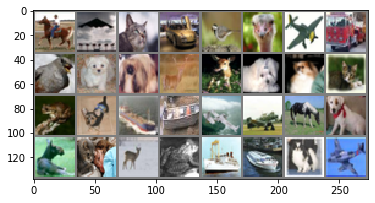

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
# print(' '.join('%5s' % classes[labels[j]] for j in range(32)))
print(' '.join('%0.1f %5s %s' % (j,classes[labels[j]], images[j].shape) for j in range(32)))


## 2. Define a Convolution Neural Network


Copy the neural network from the Neural Networks section before and modify it to
take 3-channel images (instead of 1-channel images as it was defined).



In [0]:
#model4:

dropout_value = 0.1
num_classes = 10
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
       
        # INPUT BLOCK
        self.convblock1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=8, kernel_size=(3, 3), padding=1, padding_mode = 'replicate', bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(8),
            nn.Dropout(dropout_value)
        ) 
        # input_size = 32 output_size = 32 receptive_field = 3
        # INPUT BLOCK ENDS  =============

        # CONVOLUTION BLOCK 1
        self.convblock2 = nn.Sequential(
            nn.Conv2d(in_channels=8, out_channels=16, kernel_size=(3, 3), padding=1, padding_mode = 'replicate', bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.Dropout(dropout_value)
        ) 
        # input_size = 32 output_size = 32 receptive_field = 5
        
        self.convblock3 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=(3, 3), padding=1,  padding_mode = 'replicate', bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Dropout(dropout_value)
        )
        # input_size = 32 output_size = 32 receptive_field = 7

        self.convblock4 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(3, 3), padding=1,  padding_mode = 'replicate', bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Dropout(dropout_value)
        ) 
        # input_size = 32 output_size = 32 receptive_field = 9
        # CONVOLUTION BLOCK 1 ENDS =============

        # TRANSITION BLOCK 1
        self.pool1 = nn.MaxPool2d(2, 2) 
        # input_size = 32 output_size = 16 receptive_field = 18

        self.convblock5 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=8, kernel_size=(1, 1), padding=0, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(8),
            nn.Dropout(dropout_value)
        ) 
        # input_size = 16 output_size = 16 receptive_field = 18
        # TRANSITION BLOCK 1 ENDS =============

        # CONVOLUTION BLOCK 2 - Depthwise Separable Convolution
        self.depthwise1 = nn.Sequential(
            nn.Conv2d(in_channels=8, out_channels=16, kernel_size=(3, 3), padding=1,  padding_mode = 'replicate', bias=False, groups=8),
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.Dropout(dropout_value)
        ) 
        # input_size = 16 output_size = 16 receptive_field = 20
        self.depthwise2 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=(3, 3), padding=1,  padding_mode = 'replicate', bias=False, groups=16),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Dropout(dropout_value)
        ) 
        # input_size = 16 output_size = 16 receptive_field = 22

        self.depthwise3 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(3, 3), padding=1,  padding_mode = 'replicate', bias=False, groups=32),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Dropout(dropout_value)
        ) 
        # input_size = 16 output_size = 16 receptive_field = 24
        # CONVOLUTION BLOCK 2 ENDS =============

        # TRANSITION BLOCK 2
        self.pool2 = nn.MaxPool2d(2, 2) 
        # input_size = 16 output_size = 8 receptive_field = 48
        self.convblock6 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=8, kernel_size=(1, 1), padding=0, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(8),
            nn.Dropout(dropout_value)
        ) 
        # input_size = 8 output_size = 8 receptive_field = 48
        # TRANSITION BLOCK 1 ENDS =============

        # CONVOLUTION BLOCK 3 - Dilated Convolution
        self.dilated1 = nn.Sequential(
            nn.Conv2d(in_channels=8, out_channels=16, kernel_size=(3, 3), padding=0 , bias=False, dilation=1),
            nn.ReLU(),
            nn.BatchNorm2d(16),
            nn.Dropout(dropout_value)
        ) 
        # input_size = 8 output_size = 6 receptive_field = ??
        self.dilated2 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=(3, 3), padding=0, bias=False, dilation=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Dropout(dropout_value)
        ) 
        # input_size = 6 output_size = 4 receptive_field = ??

        self.dilated3 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(3, 3), padding=0, bias=False, dilation=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Dropout(dropout_value)
        ) 
        # input_size = 4 output_size = 2 receptive_field = ??
        # CONVOLUTION BLOCK 3 ENDS =============

        # OUTPUT BLOCK
        self.GAP = nn.AdaptiveAvgPool2d(2)
        self.FC = nn.Linear(64*2*2, num_classes)
        

    def forward(self, x):
        x = self.convblock1(x)
        x = self.convblock2(x)
        x = self.convblock3(x)
        x = self.convblock4(x)
        x = self.pool1(x)
        x = self.convblock5(x)
        x = self.depthwise1(x)
        x = self.depthwise2(x)
        x = self.depthwise3(x)
        x = self.pool2(x)
        x = self.convblock6(x)
        x = self.dilated1(x)
        x = self.dilated2(x)
        x = self.dilated3(x)
        # print(x.shape)
        x = self.GAP(x)
        # print(x.shape)
        x = x.view(x.size(0), -1)
        # print(x.shape)
        x = self.FC(x)
        return F.log_softmax(x, dim=-1)

In [5]:
# !pip install torchsummary
from torchsummary import summary

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Net().to(device)
summary(model, input_size=(3,32,32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 32, 32]             216
              ReLU-2            [-1, 8, 32, 32]               0
       BatchNorm2d-3            [-1, 8, 32, 32]              16
           Dropout-4            [-1, 8, 32, 32]               0
            Conv2d-5           [-1, 16, 32, 32]           1,152
              ReLU-6           [-1, 16, 32, 32]               0
       BatchNorm2d-7           [-1, 16, 32, 32]              32
           Dropout-8           [-1, 16, 32, 32]               0
            Conv2d-9           [-1, 32, 32, 32]           4,608
             ReLU-10           [-1, 32, 32, 32]               0
      BatchNorm2d-11           [-1, 32, 32, 32]              64
          Dropout-12           [-1, 32, 32, 32]               0
           Conv2d-13           [-1, 64, 32, 32]          18,432
             ReLU-14           [-1

### 3. Define a Loss function and optimizer
Let's use a Classification Cross-Entropy loss and SGD with momentum.



In [0]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9)

## 4. Train the network

This is when things start to get interesting.
We simply have to loop over our data iterator, and feed the inputs to the
network and optimize.




In [8]:
from tqdm import tqdm


for epoch in range(51):  # loop over the dataset multiple times
    print("\n Epoch: " + str(epoch))
    pbar = tqdm(trainloader)
    running_loss = 0.0
    correct = 0
    processed = 0
    for i, (data, target) in enumerate(pbar):
        # get the inputs
        inputs, labels = data.to(device), target.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
        # Predict
        y_pred = model(inputs)
        # Update pbar-tqdm    
        pred = y_pred.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
        correct += pred.eq(labels.view_as(pred)).sum().item()
        processed += len(data)      
        pbar.set_description(desc= f'Loss={loss.item()} Batch_id={i} Accuracy={100*correct/processed:0.2f}')

    misclassified_images_list = []
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in testloader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += criterion(output, target).item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            pred_value = torch.max(output, dim=1).values

            
            match_tensor = pred.eq(target.view_as(pred))
            misclassified_images_in_batch = torch.where(match_tensor == False)
            for eachimage in misclassified_images_in_batch[0]:
               #bp()
               image_predlist = [data[eachimage], pred[eachimage].item(), pred_value[eachimage].item(), target[eachimage].item()]
               misclassified_images_list.append(image_predlist)
            correct += match_tensor.sum().item()

    test_loss /= len(testloader.dataset)
    

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(testloader.dataset),
        100. * correct / len(testloader.dataset)))
    
    test_acc = 100. * correct / len(testloader.dataset)

print('Finished Training')


  0%|          | 0/1563 [00:00<?, ?it/s]


 Epoch: 0



Loss=nan Batch_id=119 Accuracy=9.64:   7%|▋         | 117/1563 [00:04<00:43, 32.95it/s]

KeyboardInterrupt: ignored

## 5. Test the network on the test data

We have trained the network for 2 passes over the training dataset.
But we need to check if the network has learnt anything at all.

We will check this by predicting the class label that the neural network
outputs, and checking it against the ground-truth. If the prediction is
correct, we add the sample to the list of correct predictions.

### Okay, first step. Let us display an image from the test set to get familiar.



In [0]:
# dataiter = iter(testloader)
# images, labels = dataiter.next()

# # print images
# imshow(torchvision.utils.make_grid(images))
# print('GroundTruth: ', ' '.join('%0.1f %5s' % (j,classes[labels[j]]) for j in range(32)))

Okay, now let us see what the neural network thinks these examples above are:



In [0]:
# net = Net()
# outputs = net(images)

The outputs are energies for the 10 classes.
Higher the energy for a class, the more the network
thinks that the image is of the particular class.
So, let's get the index of the highest energy:



In [0]:
# _, predicted = torch.max(outputs, 1)

# print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
#                               for j in range(4)))

The results seem pretty good.

Let us look at how the network performs on the whole dataset.



In [0]:
# correct = 0
# total = 0
# with torch.no_grad():
#     for data in testloader:
#         images, labels = data
#         outputs = model(images)
#         _, predicted = torch.max(outputs.data, 1)
#         total += labels.size(0)
#         correct += (predicted == labels).sum().item()

# print('Accuracy of the network on the 10000 test images: %d %%' % (
#     100 * correct / total))

That looks waaay better than chance, which is 10% accuracy (randomly picking
a class out of 10 classes).
Seems like the network learnt something.

Hmmm, what are the classes that performed well, and the classes that did
not perform well:



In [0]:
# class_correct = list(0. for i in range(10))
# class_total = list(0. for i in range(10))
# with torch.no_grad():
#     for data in testloader:
#         images, labels = data
#         outputs = net(images)
#         _, predicted = torch.max(outputs, 1)
#         c = (predicted == labels).squeeze()
#         for i in range(4):
#             label = labels[i]
#             class_correct[label] += c[i].item()
#             class_total[label] += 1


# for i in range(10):
#     print('Accuracy of %5s : %2d %%' % (
#         classes[i], 100 * class_correct[i] / class_total[i]))